<a href="https://colab.research.google.com/github/AnnayanB/Practice/blob/main/Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv('/content/train_BRCpofr.csv')
data.drop(columns=['id'],inplace=True)

In [ ]:
data.head()

,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
0,Male,Urban,Bachelor,5L-10L,1,5,5790,More than 1,A,Platinum,64308
1,Male,Rural,High School,5L-10L,0,8,5080,More than 1,A,Platinum,515400
2,Male,Urban,Bachelor,5L-10L,1,8,2599,More than 1,A,Platinum,64212
3,Female,Rural,High School,5L-10L,0,7,0,More than 1,A,Platinum,97920
4,Male,Urban,High School,More than 10L,1,6,3508,More than 1,A,Gold,59736


In [ ]:
data.shape

(89392, 11)

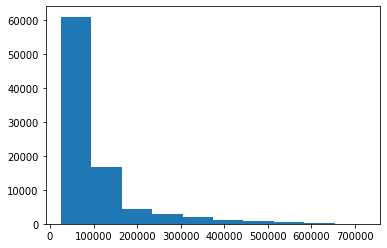

In [ ]:
plt.hist(data['cltv'])
plt.show()

In [ ]:
data.dtypes

gender            object
area              object
qualification     object
income            object
marital_status     int64
vintage            int64
claim_amount       int64
num_policies      object
policy            object
type_of_policy    object
cltv               int64
dtype: object

In [ ]:
for i in data.columns:
  if(data[i].dtype=='object'):
    print("{} has values {}".format(i,data[i].value_counts()))

gender has values Male      50497
Female    38895
Name: gender, dtype: int64
area has values Urban    62455
Rural    26937
Name: area, dtype: int64
qualification has values High School    46247
Bachelor       39399
Others          3746
Name: qualification, dtype: int64
income has values 5L-10L           52716
2L-5L            21158
More than 10L    13664
<=2L              1854
Name: income, dtype: int64
num_policies has values More than 1    60263
1              29129
Name: num_policies, dtype: int64
policy has values A    56644
B    24635
C     8113
Name: policy, dtype: int64
type_of_policy has values Platinum    47796
Silver      21010
Gold        20586
Name: type_of_policy, dtype: int64


In [ ]:
from sklearn import model_selection
if __name__=="__main__":
  data['kfold']=-1
  data=data.sample(frac=1).reset_index(drop=True)
  kf=model_selection.KFold(n_splits=10)
  for fold,(trn_,val_) in enumerate (kf.split(X=data)):
    data.loc[val_,'kfold']=fold
  data.to_csv("data.csv",index=False)

In [ ]:
data=pd.read_csv('/content/data.csv')

In [ ]:
data.tail()

,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv,kfold
89387,Female,Urban,High School,5L-10L,1,2,5650,More than 1,A,Gold,148848,9
89388,Male,Rural,High School,5L-10L,0,5,0,More than 1,B,Gold,61968,9
89389,Male,Urban,Others,5L-10L,1,3,5892,1,B,Gold,37056,9
89390,Female,Urban,Bachelor,2L-5L,1,6,9027,More than 1,A,Platinum,99192,9
89391,Female,Urban,Bachelor,5L-10L,1,5,4565,More than 1,B,Gold,72492,9


In [ ]:
from sklearn.metrics import mean_squared_error
import math
def run(fold,model,data):
  df_train=data[data.kfold!=fold].reset_index(drop=True)
  df_valid=data[data.kfold==fold].reset_index(drop=True)
  x_train=df_train.drop(columns=["cltv"],axis=1).values
  y_train=df_train['cltv'].values
  y_train=[np.log(i+1) for i in y_train]
  x_test=df_valid.drop(columns=["cltv"],axis=1).values
  y_test=df_valid['cltv'].values
  model.fit(x_train,y_train)
  ans=model.predict(x_test)
  ans=[int(math.exp(i)-1) for i in ans]
  mse=mean_squared_error(ans,y_test)
  rmse=math.sqrt(mse)
  return rmse

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
categorical_features=data.select_dtypes(include=['object']).columns

In [ ]:
def base_line():
  dfbase=pd.get_dummies(data,columns=categorical_features)
  model=LinearRegression()
  for i in range(0,10):
    print(run(i,model,dfbase))


In [ ]:
base_line()

89303.5600397408
82971.32658249511
84551.94410600199
84202.03765604304
87839.49959001275
84884.86200960146
87079.21787264424
82620.67782893137
87000.55548747689
86239.65213747245


In [ ]:
#target encoding
from sklearn.preprocessing import LabelEncoder
df=data.copy()
def base_line_target():
  le=LabelEncoder()
  model=LinearRegression()
  for i in categorical_features:
    df[i]=le.fit_transform(df[i])
  for i in range(0,10):
    print(run(i,model,df))

In [ ]:
base_line_target()

89469.61762847338
83110.70005945105
84721.03993793004
84313.54447581332
87953.38619739555
85027.08078678389
87209.07529651657
82777.14946466015
87160.36950549347
86355.16985785696


In [ ]:
df.head()

,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv,kfold
0,1,1,1,1,0,4,11730,1,0,0,145332,0
1,1,0,0,1,1,0,0,0,0,2,51072,0
2,1,1,1,1,1,1,4241,1,0,1,109464,0
3,0,1,2,0,0,6,0,0,0,1,49764,0
4,1,1,0,1,1,5,5735,0,0,2,68640,0


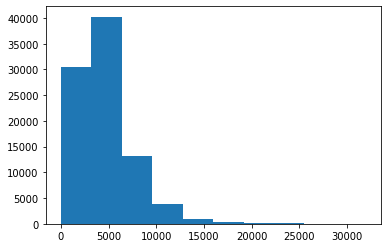

In [ ]:
plt.hist(data['claim_amount'])
plt.show()

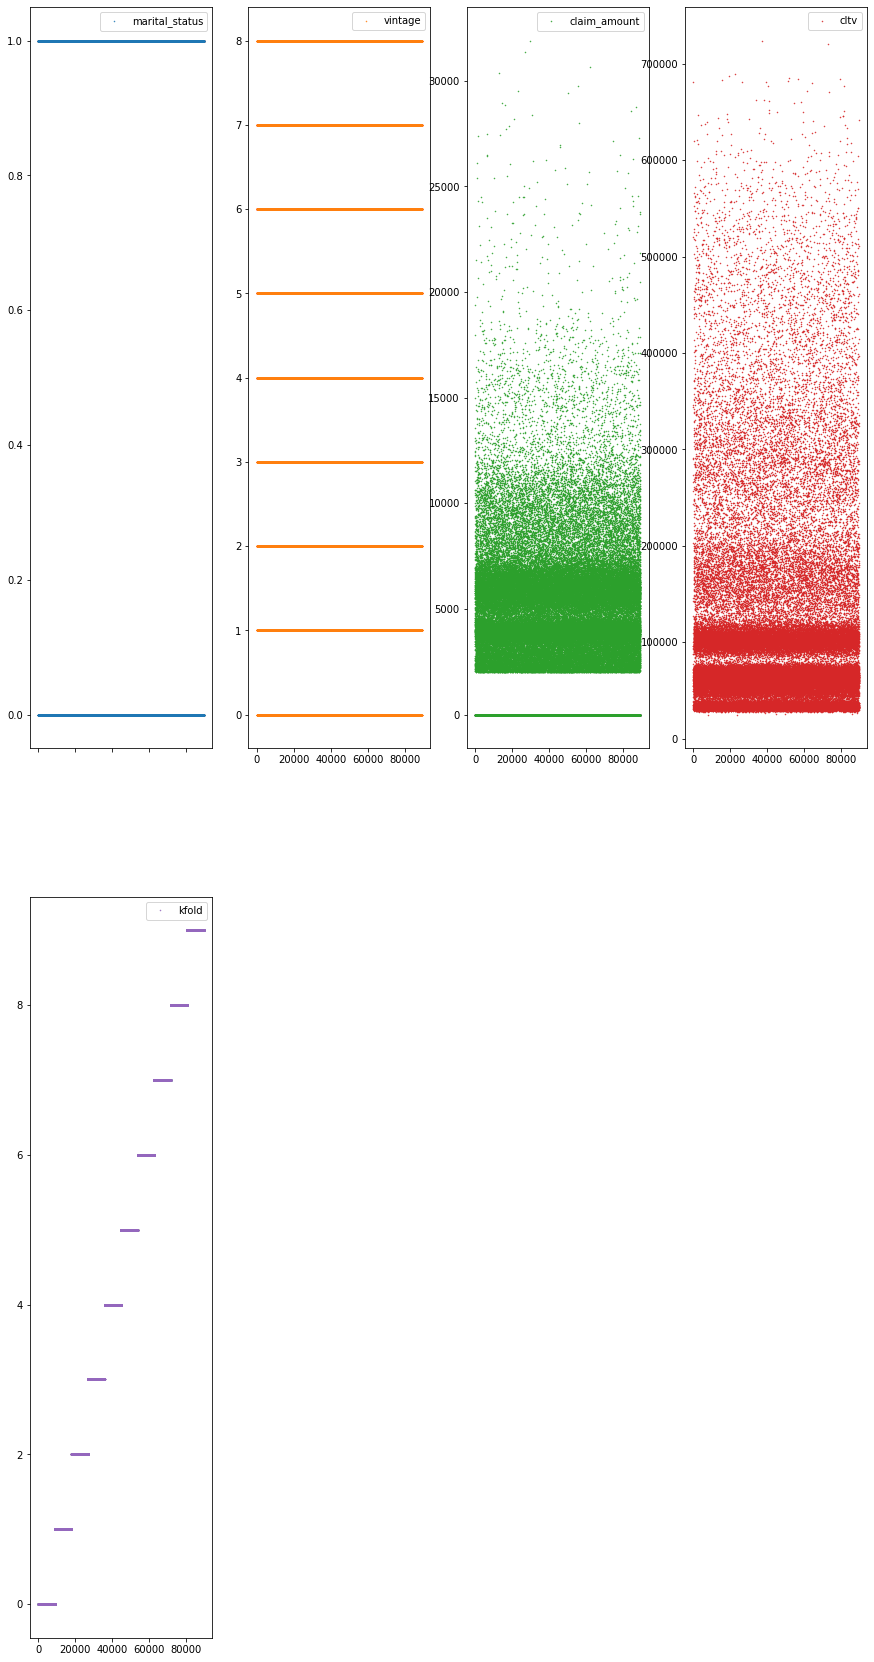

In [ ]:
data.plot(lw=0,marker=".",subplots=True,layout=(-1,4),figsize=(15,30),markersize=1)
plt.show()

In [ ]:
data.head()

,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv,kfold
0,Male,Urban,High School,5L-10L,0,4,11730,More than 1,A,Gold,145332,0
1,Male,Rural,Bachelor,5L-10L,1,0,0,1,A,Silver,51072,0
2,Male,Urban,High School,5L-10L,1,1,4241,More than 1,A,Platinum,109464,0
3,Female,Urban,Others,2L-5L,0,6,0,1,A,Platinum,49764,0
4,Male,Urban,Bachelor,5L-10L,1,5,5735,1,A,Silver,68640,0


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.preprocessing import StandardScaler

In [ ]:
def run_dl_baseline(fold,data):
  df_train=data[data.kfold!=fold].reset_index(drop=True)
  df_valid=data[data.kfold==fold].reset_index(drop=True)
  x_train=df_train.drop(columns=["cltv"],axis=1).values
  y_train=df_train['cltv'].values
  y_train=[np.log(i+1) for i in y_train]
  x_test=df_valid.drop(columns=["cltv"],axis=1).values
  y_test=df_valid['cltv'].values
  x_train=np.array(x_train)
  y_train=np.array(y_train)
  x_test=np.array(x_test)
  y_test=np.array(y_test)
  scaler=StandardScaler()
  x_train=scaler.fit_transform(x_train)
  x_test=scaler.transform(x_test)
  model = Sequential()
  model.add(Dense(64, input_shape=(x_train.shape[1],), kernel_initializer='normal', activation='relu'))
  model.add(Dense(32, kernel_initializer='normal', activation='relu'))
  model.add(Dense(16, kernel_initializer='normal', activation='relu'))
  model.add(Dense(1, kernel_initializer='normal'))
  model.compile(loss='mean_squared_error', optimizer='adam')
  estimators = []
  #estimators.append(('standardize', StandardScaler()))
  #estimators.append(('mlp', KerasRegressor(model=model, epochs=50, batch_size=5, verbose=0)))
  #pipeline = Pipeline(estimators)
  # Compile model
  model.fit(x_train,y_train,epochs=50,batch_size=500,verbose=0)
  ans=model.predict(x_test)
  ans=[int(math.exp(i)-1) for i in ans]
  mse=mean_squared_error(ans,y_test)
  rmse=math.sqrt(mse)
  return rmse

In [ ]:
for i in range(0,10):
  print(run_dl_baseline(i,df))

280/280 [==============================] - 0s 852us/step
88108.63851270058
280/280 [==============================] - 0s 805us/step
84002.13370773595
280/280 [==============================] - 0s 845us/step
84673.71596333342
280/280 [==============================] - 0s 932us/step
83507.28722183214
280/280 [==============================] - 0s 832us/step
90060.65532820017
280/280 [==============================] - 0s 836us/step
85759.84590593106
280/280 [==============================] - 0s 806us/step
85822.65015897734
280/280 [==============================] - 0s 842us/step
82363.68340319065
280/280 [==============================] - 0s 844us/step
86156.90032312211
280/280 [==============================] - 0s 847us/step
87016.66884032499


In [ ]:
#new features adding using autoencoders

In [ ]:
data.columns

Index(['gender', 'area', 'qualification', 'income', 'marital_status',
       'vintage', 'claim_amount', 'num_policies', 'policy', 'type_of_policy',
       'cltv', 'kfold'],
      dtype='object')

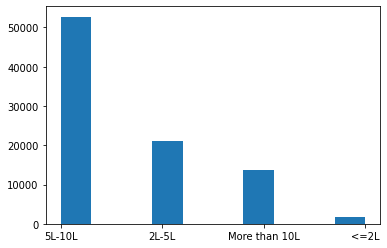

In [ ]:
plt.hist(data['income'])
plt.show()

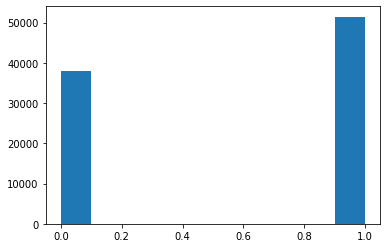

In [ ]:
plt.hist(data['marital_status'])
plt.show()

In [ ]:
df_chinmar=data[data['marital_status']==1]
df_chinnmar=data[data['marital_status']!=1]

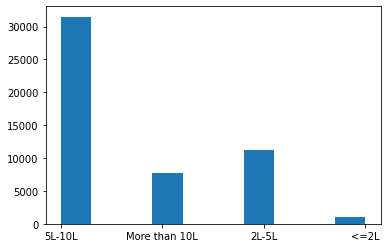

In [ ]:
plt.hist(df_chinmar['income'])
plt.show()

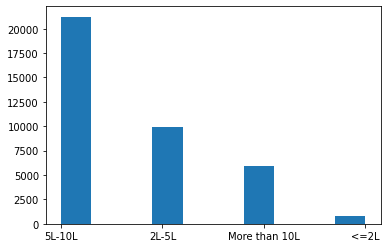

In [ ]:
plt.hist(df_chinnmar['income'])
plt.show()

In [ ]:
df_chinnmar.head()

,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv,kfold
0,Male,Urban,High School,5L-10L,0,4,11730,More than 1,A,Gold,145332,0
3,Female,Urban,Others,2L-5L,0,6,0,1,A,Platinum,49764,0
6,Male,Rural,High School,5L-10L,0,7,0,More than 1,B,Platinum,96372,0
7,Female,Urban,Bachelor,5L-10L,0,2,5857,More than 1,B,Silver,126660,0
14,Female,Rural,High School,5L-10L,0,7,0,1,A,Platinum,34932,0


In [ ]:
df.head()

,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv,kfold
0,1,1,1,1,0,4,11730,1,0,0,145332,0
1,1,0,0,1,1,0,0,0,0,2,51072,0
2,1,1,1,1,1,1,4241,1,0,1,109464,0
3,0,1,2,0,0,6,0,0,0,1,49764,0
4,1,1,0,1,1,5,5735,0,0,2,68640,0


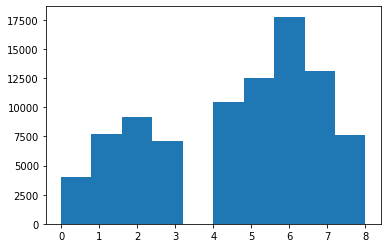

In [ ]:
plt.hist(df['vintage'])
plt.show()

In [ ]:
df_new=data.copy()
df_new['qualification'].replace(['High School','Bachelor','Others'],[40,30,20],inplace=True)

In [ ]:
df_new.head()

,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv,kfold
0,Male,Urban,40,5L-10L,0,4,11730,More than 1,A,Gold,145332,0
1,Male,Rural,30,5L-10L,1,0,0,1,A,Silver,51072,0
2,Male,Urban,40,5L-10L,1,1,4241,More than 1,A,Platinum,109464,0
3,Female,Urban,20,2L-5L,0,6,0,1,A,Platinum,49764,0
4,Male,Urban,30,5L-10L,1,5,5735,1,A,Silver,68640,0


In [ ]:
df_new['gender'].replace([0,1],['Male','Female'],inplace=True)
df_new['area'].replace(['Urban','Rural'],[50,20],inplace=True)
df_new['income'].replace(['5L-10L','2L-5L','More than 10L','<=2L'],[60,40,30,20],inplace=True)

In [ ]:
df_new.head()

,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv,kfold
0,Male,50,40,60,0,4,11730,More than 1,A,Gold,145332,0
1,Male,20,30,60,1,0,0,1,A,Silver,51072,0
2,Male,50,40,60,1,1,4241,More than 1,A,Platinum,109464,0
3,Female,50,20,40,0,6,0,1,A,Platinum,49764,0
4,Male,50,30,60,1,5,5735,1,A,Silver,68640,0


In [ ]:
df_new['num_policies'].replace(['More than 1','1'],[30,10],inplace=True)

In [ ]:
df_new['policy'].replace(['A','B','C'],[40,30,20],inplace=True)
df_new['type_of_policy'].replace(['Platinum','Gold','Silver'],[60,40,20],inplace=True)

In [ ]:
df_new.head()

,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv,kfold
0,Male,50,40,60,0,4,11730,30,40,40,145332,0
1,Male,20,30,60,1,0,0,10,40,20,51072,0
2,Male,50,40,60,1,1,4241,30,40,60,109464,0
3,Female,50,20,40,0,6,0,10,40,60,49764,0
4,Male,50,30,60,1,5,5735,10,40,20,68640,0


In [ ]:
df_new['marital_status'].replace([0,1],[20,30],inplace=True)

In [ ]:
const=103
df_new['val1']=df_new['qualification']*df_new['marital_status']*const

In [ ]:
df_new.head()

,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv,kfold,val1
0,Male,50,40,60,20,4,11730,30,40,40,145332,0,82400
1,Male,20,30,60,30,0,0,10,40,20,51072,0,92700
2,Male,50,40,60,30,1,4241,30,40,60,109464,0,123600
3,Female,50,20,40,20,6,0,10,40,60,49764,0,41200
4,Male,50,30,60,30,5,5735,10,40,20,68640,0,92700


In [ ]:
df_new['val2']=(df_new['cltv'])*df_new['policy']
df_new['val3']=(df_new['cltv'])*df_new['area']

In [ ]:
df_new.head()

,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv,kfold,val1,val2,val3
0,Male,50,40,60,20,4,11730,30,40,40,145332,0,82400,5813280,7266600
1,Male,20,30,60,30,0,0,10,40,20,51072,0,92700,2042880,1021440
2,Male,50,40,60,30,1,4241,30,40,60,109464,0,123600,4378560,5473200
3,Female,50,20,40,20,6,0,10,40,60,49764,0,41200,1990560,2488200
4,Male,50,30,60,30,5,5735,10,40,20,68640,0,92700,2745600,3432000


In [ ]:
df_new['val4']=const*df_new['type_of_policy']*df_new['num_policies']

In [ ]:
df_new.head()

,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv,kfold,val1,val2,val3,val4
0,Male,50,40,60,20,4,11730,30,40,40,145332,0,82400,5813280,7266600,123600
1,Male,20,30,60,30,0,0,10,40,20,51072,0,92700,2042880,1021440,20600
2,Male,50,40,60,30,1,4241,30,40,60,109464,0,123600,4378560,5473200,185400
3,Female,50,20,40,20,6,0,10,40,60,49764,0,41200,1990560,2488200,61800
4,Male,50,30,60,30,5,5735,10,40,20,68640,0,92700,2745600,3432000,20600


In [ ]:
df_new['val5']=df_new['claim_amount']*df_new['income']

In [ ]:
df_new.head()
df_new['gender'].replace(['Male','Female'],[0,1],inplace=True)

In [ ]:
def run_dl_baseline(fold,data):
  df_train=data[data.kfold!=fold].reset_index(drop=True)
  df_valid=data[data.kfold==fold].reset_index(drop=True)
  x_train=df_train.drop(columns=["cltv"],axis=1).values
  y_train=df_train['cltv'].values
  y_train=[np.log(i+1) for i in y_train]
  x_test=df_valid.drop(columns=["cltv"],axis=1).values
  y_test=df_valid['cltv'].values
  x_train=np.array(x_train)
  y_train=np.array(y_train)
  x_test=np.array(x_test)
  y_test=np.array(y_test)
  scaler=StandardScaler()
  x_train=scaler.fit_transform(x_train)
  x_test=scaler.transform(x_test)
  model = Sequential()
  model.add(Dense(64, input_shape=(x_train.shape[1],), kernel_initializer='normal', activation='relu'))
  model.add(Dense(32, kernel_initializer='normal', activation='relu'))
  model.add(Dense(16, kernel_initializer='normal', activation='relu'))
  model.add(Dense(1, kernel_initializer='normal'))
  model.compile(loss='mean_squared_error', optimizer='adam')
  estimators = []
  #estimators.append(('standardize', StandardScaler()))
  #estimators.append(('mlp', KerasRegressor(model=model, epochs=50, batch_size=5, verbose=0)))
  #pipeline = Pipeline(estimators)
  # Compile model
  model.fit(x_train,y_train,epochs=50,batch_size=500,verbose=0)
  ans=model.predict(x_test)
  ans=[int(math.exp(i)-1) for i in ans]
  mse=mean_squared_error(ans,y_test)
  rmse=math.sqrt(mse)
  return rmse

In [ ]:
for i in range(0,10):
  print(run_dl_baseline(i,df_new))

280/280 [==============================] - 0s 896us/step
86537.08410794204
280/280 [==============================] - 0s 765us/step
149422.36235728906
280/280 [==============================] - 0s 761us/step
7738.084602458176
280/280 [==============================] - 0s 772us/step
9024.983321444071
280/280 [==============================] - 0s 780us/step
8938.235392745182
280/280 [==============================] - 0s 826us/step
27521.17895198845
280/280 [==============================] - 0s 792us/step
24356.35107483953
280/280 [==============================] - 0s 832us/step
7623.564815867572
280/280 [==============================] - 0s 790us/step
8832.102210508796
280/280 [==============================] - 0s 765us/step
7506.6129387475


In [ ]:
def run_dl_baseline2(fold,data):
  df_train=data[data.kfold!=fold].reset_index(drop=True)
  df_valid=data[data.kfold==fold].reset_index(drop=True)
  x_train=df_train.drop(columns=["cltv"],axis=1).values
  y_train=df_train['cltv'].values
  y_train=[np.log(i+1) for i in y_train]
  x_test=df_valid.drop(columns=["cltv"],axis=1).values
  y_test=df_valid['cltv'].values
  x_train=np.array(x_train)
  y_train=np.array(y_train)
  x_test=np.array(x_test)
  y_test=np.array(y_test)
  scaler=StandardScaler()
  x_train=scaler.fit_transform(x_train)
  x_test=scaler.transform(x_test)
  model = Sequential()
  model.add(Dense(64, input_shape=(x_train.shape[1],), kernel_initializer='normal', activation='relu'))
  model.add(Dense(32, kernel_initializer='normal', activation='relu'))
  model.add(Dense(16, kernel_initializer='normal', activation='relu'))
  model.add(Dense(1, kernel_initializer='normal'))
  model.compile(loss='mean_squared_error', optimizer='adam')
  # Compile model
  batch_size=[100,200,300]
  epochs=[20,50,100]
  for i in epochs:
    for j in batch_size:
      model.fit(x_train,y_train,epochs=i,batch_size=j,verbose=0)
      ans=model.predict(x_test)
      ans=[int(math.exp(i)-1) for i in ans]
      mse=mean_squared_error(ans,y_test)
      rmse=math.sqrt(mse)
      print("for batch size{} and epochs{} the rmse is {}".format(j,i,rmse))
  return rmse

In [ ]:
run_dl_baseline2(9,df_new)

280/280 [==============================] - 0s 820us/step
for batch size100 and epochs20 the rmse is 9979.557263098819
280/280 [==============================] - 0s 772us/step
for batch size200 and epochs20 the rmse is 5503.553155314357
280/280 [==============================] - 0s 888us/step
for batch size300 and epochs20 the rmse is 3589.1201590124438
280/280 [==============================] - 0s 868us/step
for batch size100 and epochs50 the rmse is 4720.134625870405
280/280 [==============================] - 0s 762us/step
for batch size200 and epochs50 the rmse is 5637.947603268501
280/280 [==============================] - 0s 761us/step
for batch size300 and epochs50 the rmse is 2187.528497172665
280/280 [==============================] - 0s 708us/step
for batch size100 and epochs100 the rmse is 1991.291370966456
280/280 [==============================] - 0s 779us/step
for batch size200 and epochs100 the rmse is 1465.5711258077624
280/280 [==============================] - 0s 739us/

964.4037953581345

In [ ]:
data_test=pd.read_csv('/content/test_koRSKBP.csv')
data_test.head()

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy
0,89393,Female,Rural,High School,5L-10L,0,6,2134,More than 1,B,Silver
1,89394,Female,Urban,High School,2L-5L,0,4,4102,More than 1,A,Platinum
2,89395,Male,Rural,High School,5L-10L,1,7,2925,More than 1,B,Gold
3,89396,Female,Rural,Bachelor,More than 10L,1,2,0,More than 1,B,Silver
4,89397,Female,Urban,High School,2L-5L,0,5,14059,More than 1,B,Silver


In [ ]:
data_test['policy'].replace(['A','B','C'],[40,30,20],inplace=True)
data_test['type_of_policy'].replace(['Platinum','Gold','Silver'],[60,40,20],inplace=True)
data_test['num_policies'].replace(['More than 1','1'],[30,10],inplace=True)
data_test['gender'].replace([0,1],['Male','Female'],inplace=True)
data_test['area'].replace(['Urban','Rural'],[50,20],inplace=True)
data_test['income'].replace(['5L-10L','2L-5L','More than 10L','<=2L'],[60,40,30,20],inplace=True)

In [ ]:
data_test['qualification'].replace(['High School','Bachelor','Others'],[40,30,20],inplace=True)

In [ ]:
data_test['gender'].replace(['Male','Female'],[0,1],inplace=True)

In [ ]:
data_test.head()

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy
0,89393,1,20,40,60,0,6,2134,30,30,20
1,89394,1,50,40,40,0,4,4102,30,40,60
2,89395,0,20,40,60,1,7,2925,30,30,40
3,89396,1,20,30,30,1,2,0,30,30,20
4,89397,1,50,40,40,0,5,14059,30,30,20


In [ ]:
data_test['val1']=data_test['qualification']*data_test['marital_status']*const
data_test['val2']=(df_new['cltv'])*data_test['policy']
data_test['val3']=(df_new['cltv'])*data_test['area']
data_test['val4']=const*data_test['type_of_policy']*data_test['num_policies']
data_test['val5']=data_test['claim_amount']*data_test['income']

In [ ]:
data_test.head()

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,val1,val2,val3,val4,val5
0,89393,1,20,40,60,0,6,2134,30,30,20,0,4359960.0,2906640.0,61800,128040
1,89394,1,50,40,40,0,4,4102,30,40,60,0,2042880.0,2553600.0,185400,164080
2,89395,0,20,40,60,1,7,2925,30,30,40,4120,3283920.0,2189280.0,123600,175500
3,89396,1,20,30,30,1,2,0,30,30,20,3090,1492920.0,995280.0,61800,0
4,89397,1,50,40,40,0,5,14059,30,30,20,0,2059200.0,3432000.0,61800,562360


In [ ]:
def run_dl_baseline3(fold,data,data_test):
  df_train=data[data.kfold!=fold].reset_index(drop=True)
  df_valid=data[data.kfold==fold].reset_index(drop=True)
  x_train=df_train.drop(columns=["cltv",'kfold'],axis=1).values
  y_train=df_train['cltv'].values
  y_train=[np.log(i+1) for i in y_train]
  x_test=data_test.drop(columns=['id'])
  x_train=np.array(x_train)
  y_train=np.array(y_train)
  x_test=np.array(x_test)
  scaler=StandardScaler()
  x_train=scaler.fit_transform(x_train)
  x_test=scaler.transform(x_test)
  model = Sequential()
  model.add(Dense(64, input_shape=(x_train.shape[1],), kernel_initializer='normal', activation='relu'))
  model.add(Dense(32, kernel_initializer='normal', activation='relu'))
  model.add(Dense(16, kernel_initializer='normal', activation='relu'))
  model.add(Dense(1, kernel_initializer='normal'))
  model.compile(loss='mean_squared_error', optimizer='adam')
  # Compile model
  model.fit(x_train,y_train,epochs=100,batch_size=300,verbose=0)
  ans=model.predict(x_test)
  ans=[int(math.exp(i)-1) for i in ans]
  return ans

In [ ]:
answer=run_dl_baseline3(9,df_new,data_test)

1863/1863 [==============================] - 2s 790us/step


In [ ]:
answer

[259727763660,
 601137413023,
 448247500774,
 24739461084,
 889744527372,
 90439352758,
 55094568383,
 832023388498,
 29805819985,
 970395264457,
 122253160471,
 111880448753,
 33067697570,
 93780350811,
 48784463055,
 231300729039,
 132098969227,
 449051888057,
 513415683925,
 1153674826639,
 681649718451,
 34433005991,
 18194824088,
 434316354088,
 662348098430,
 20926142683,
 14428115576,
 652925636660,
 263964853979,
 232991268411,
 315092897992,
 118869176439,
 81303290930,
 754081528356,
 830876808134,
 486729567327,
 76093683393,
 38434780254,
 529859767893,
 204944932155,
 24356608128,
 43849045298,
 54499662306,
 144103013238,
 50435875896,
 972516840266,
 53327221137,
 241483223971,
 1173238102004,
 25550104453,
 69382211074,
 61994131062,
 326344374631,
 356912895540,
 959942658636,
 138869073516,
 419745603010,
 98269529662,
 329989118210,
 392718036543,
 386336855945,
 269837287714,
 88322761601,
 620966469446,
 392269611679,
 112793860182,
 1230082480888,
 651988556069,
 

In [ ]:
data_test['cltv']=np.array(answer)

In [ ]:
data_test.head()

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,val1,val2,val3,val4,val5,cltv
0,89393,1,20,40,60,0,6,2134,30,30,20,0,4359960.0,2906640.0,61800,128040,259727763660
1,89394,1,50,40,40,0,4,4102,30,40,60,0,2042880.0,2553600.0,185400,164080,601137413023
2,89395,0,20,40,60,1,7,2925,30,30,40,4120,3283920.0,2189280.0,123600,175500,448247500774
3,89396,1,20,30,30,1,2,0,30,30,20,3090,1492920.0,995280.0,61800,0,24739461084
4,89397,1,50,40,40,0,5,14059,30,30,20,0,2059200.0,3432000.0,61800,562360,889744527372


In [ ]:
data_subm=data_test[['id','cltv']]

In [ ]:
data_subm.head()

,id,cltv
0,89393,259727763660
1,89394,601137413023
2,89395,448247500774
3,89396,24739461084
4,89397,889744527372


In [ ]:
data_subm.tail()

,id,cltv
59590,148983,14838121294
59591,148984,239214019184
59592,148985,391344439117
59593,148986,247996627565
59594,148987,52036584700


In [ ]:
data_subm.to_csv('submission.csv',index=False)